In [1]:
import pandas as pd 
from pandas import plotting as pld
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#### Website https://www.kaggle.com/c/forest-cover-type-kernels-only/data
train=pd.read_csv('/Users/michaelremington/Documents/Kaggel Competitions/forest-cover-type-kernels-only/train.csv')
test=pd.read_csv('/Users/michaelremington/Documents/Kaggel Competitions/forest-cover-type-kernels-only/test.csv')

In [2]:
##### Data Exploration #####
print('Number of Data Points in Training')
print(len(train))
print('Number of Data Points in Test')
print(len(test))
print('Number of Columns:'+ str(len(train.columns.tolist())))
treekey=[[1,'Spruce/Fir'],
[2,'Lodgepole Pine'],
[3,'Ponderosa Pine'],
[4,'Cottonwood/Willow'],
[5,'Aspen'],
[6,'Douglas-fir'],
[7,'Krummholz']]
treekey=pd.DataFrame(treekey, columns = ['key' , 'Tree Type']) 
##print(train.columns.tolist())
train=train.merge(treekey, left_on='Cover_Type', right_on='key')



Number of Data Points in Training
15120
Number of Data Points in Test
565892
Number of Columns:56


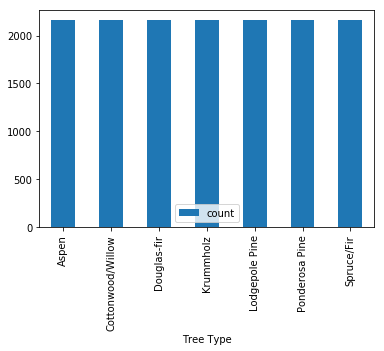

In [3]:
##### Data Exploration #####
#### Bar Chart
train.groupby('Tree Type')['Id'].agg(['count']).plot(kind='bar')

In [4]:
a=[]
for col in train.columns:
     #print(col)
     a.append(col)
     

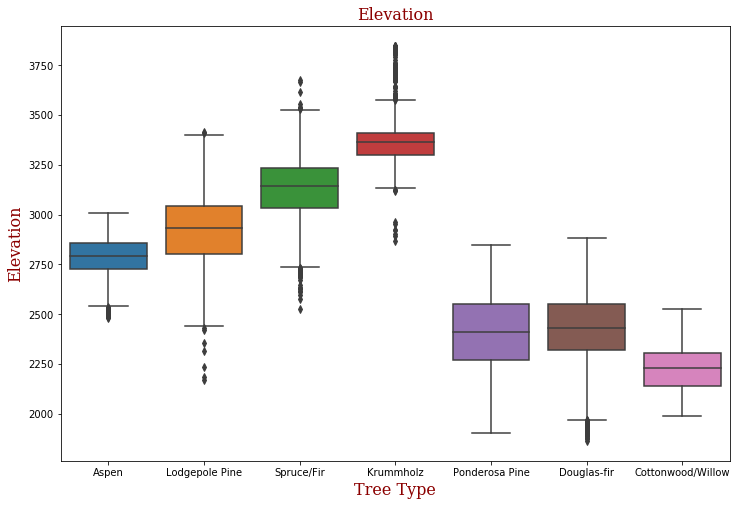

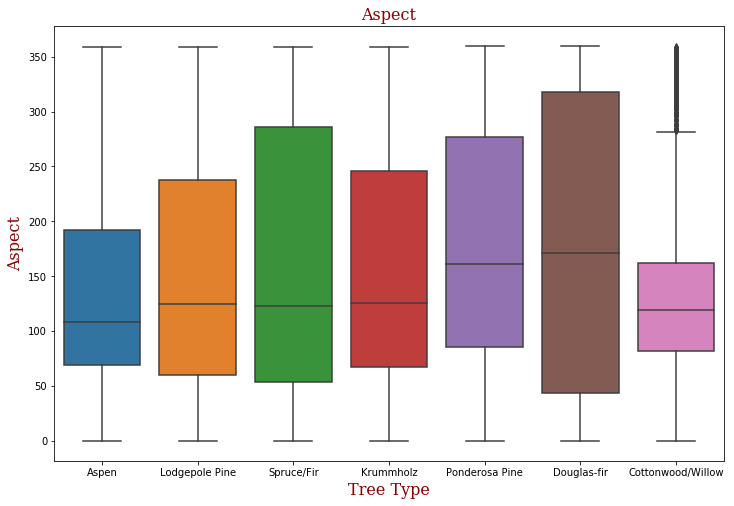

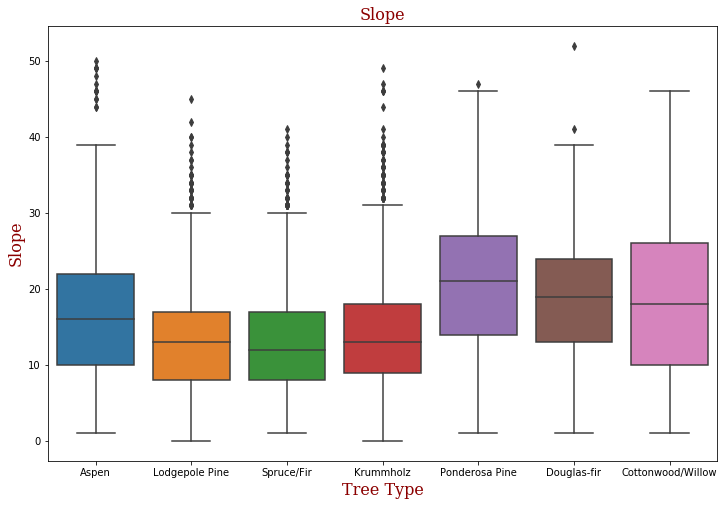

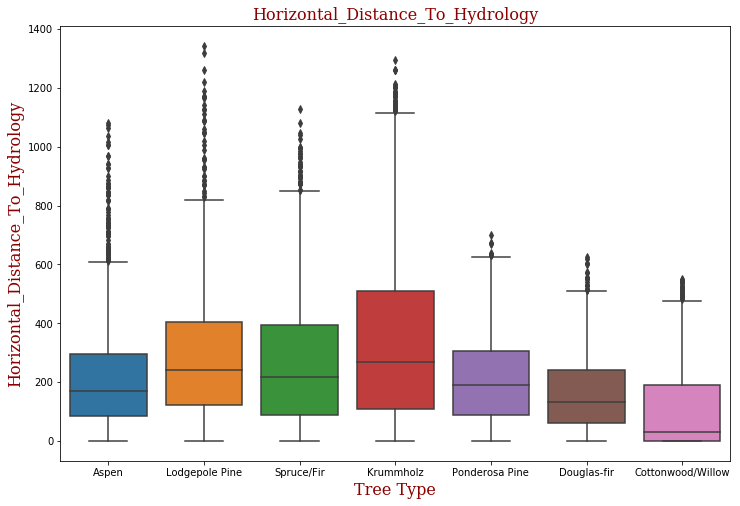

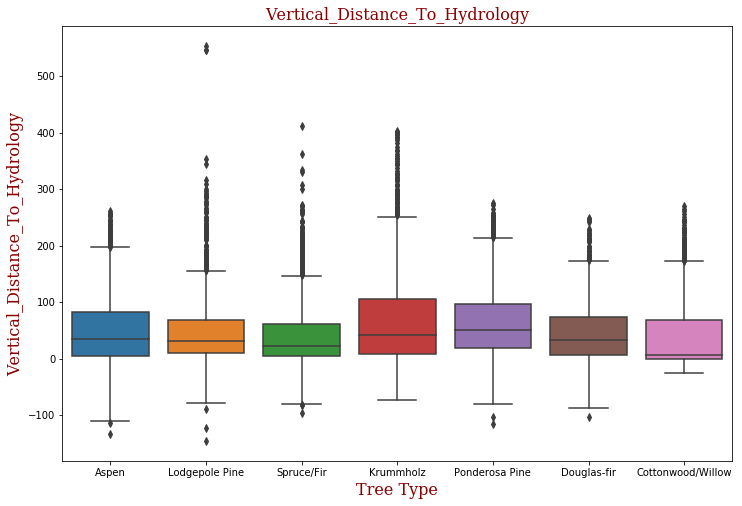

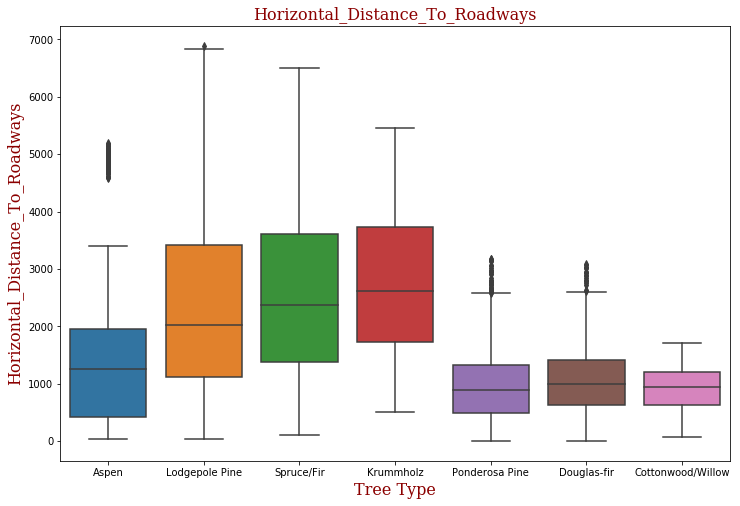

In [5]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
for x in a[1:7]:
    plt.figure(figsize=(12,8))
    ax = sns.boxplot(x="Tree Type", y=x, data=train)
    plt.title(x, fontdict=font)
    plt.xlabel('Tree Type', fontdict=font)
    plt.ylabel(x, fontdict=font)
    


In [14]:
train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,key
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,7.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1153ad2e8>,
      dtype=object)

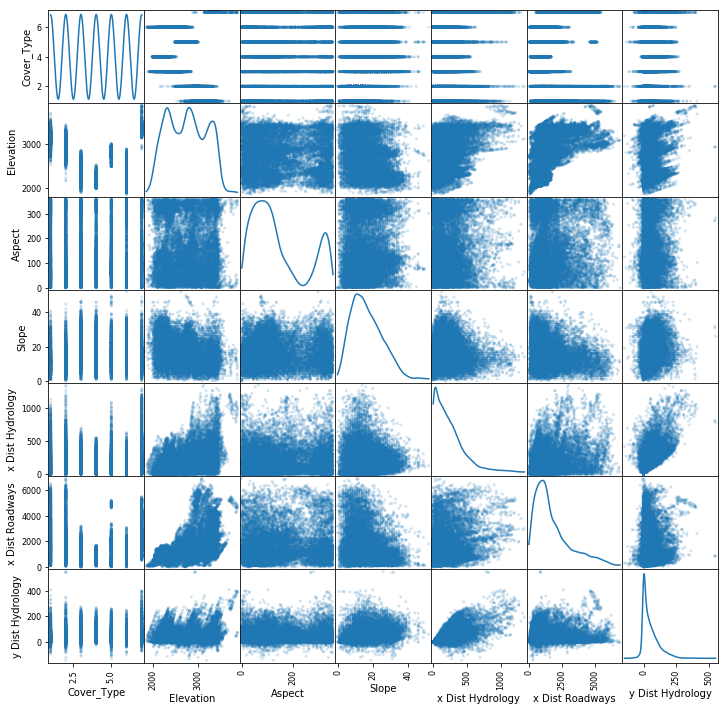

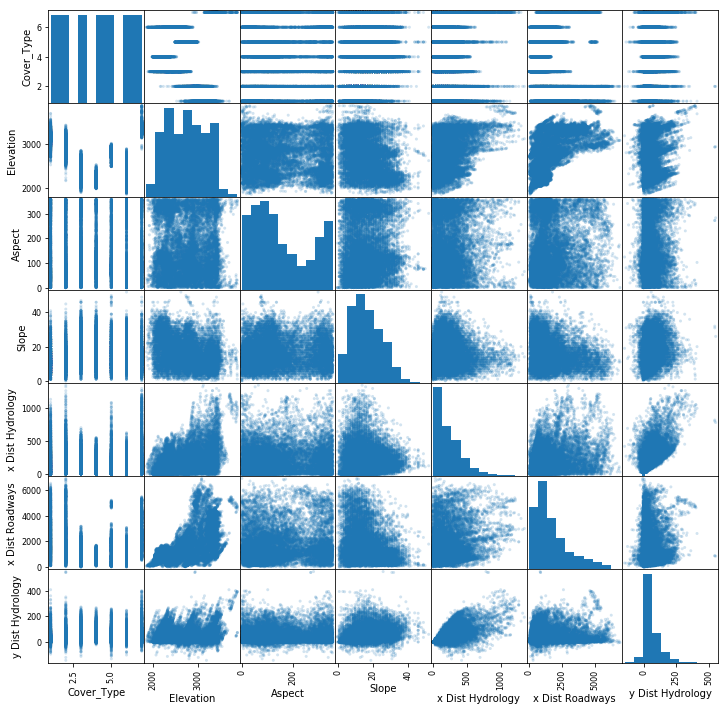

In [19]:
tg=train.rename(columns={"Horizontal_Distance_To_Hydrology":"x Dist Hydrology",
                         "Horizontal_Distance_To_Roadways":"x Dist Roadways",
                        "Vertical_Distance_To_Hydrology":"y Dist Hydrology",
                        })
tg=tg[['Tree Type','Cover_Type','Elevation', 'Aspect', 'Slope','x Dist Hydrology','x Dist Roadways','y Dist Hydrology']]
pld.scatter_matrix(tg[['Cover_Type','Elevation', 'Aspect', 'Slope','x Dist Hydrology','x Dist Roadways','y Dist Hydrology']],
                        alpha = 0.2, figsize = (12, 12), diagonal = 'kde')
pld.scatter_matrix(tg[['Cover_Type','Elevation', 'Aspect', 'Slope','x Dist Hydrology','x Dist Roadways','y Dist Hydrology']],
                        alpha = 0.2, figsize = (12, 12), diagonal = 'hist')